# Implementação de um perceptron (neurônio artificial) e treinamento para resolver a porta lógica AND

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função não-linear: sigmoide

In [2]:
def sigmoide(a):
    return 1 / (1 + np.exp(-a))

In [3]:
for i in [-100, -10, -1, -0.1, 0, 0.1, 1, 10, 100]:
    print(i, " -> ", sigmoide(i))

-100  ->  3.7200759760208356e-44
-10  ->  4.5397868702434395e-05
-1  ->  0.2689414213699951
-0.1  ->  0.47502081252106
0  ->  0.5
0.1  ->  0.52497918747894
1  ->  0.7310585786300049
10  ->  0.9999546021312976
100  ->  1.0


In [4]:
# Esta função também pode receber vetores (e matrizes, etc.)
sigmoide(np.array([-100, -10, -1, -0.1, 0, 0.1, 1, 10, 100]))

array([3.72007598e-44, 4.53978687e-05, 2.68941421e-01, 4.75020813e-01,
       5.00000000e-01, 5.24979187e-01, 7.31058579e-01, 9.99954602e-01,
       1.00000000e+00])

## No gráfico abaixo observa-se que a sigmoide transforma qualquer valor para a faixa entre 0 e 1

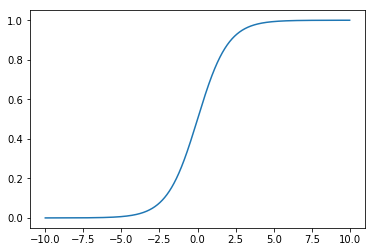

In [5]:
x = (np.array(range(2000)) - 1000) / 100 
plt.plot(x, sigmoide(x))

In [6]:
class Perceptron:
    
    def __init__(self, tamanho_entrada, taxa_aprendizado):
        """
            O perceptron possui tamanho_entrada + 1 pesos
        """
        # Inicializando com valores entre -0.1 e 0.1
        self.pesos = (np.random.random(size=tamanho_entrada+1) - 0.5) / 5
        self.taxa_aprendizado = taxa_aprendizado
        
    def predicao(self, entrada):
        # Adicionando o viés
        entrada_neuronio = np.concatenate([np.array([1]), entrada])
        # Multiplicando cada valor pelo seu peso
        entrada_neuronio = entrada_neuronio * self.pesos
        # Aplicando a função de ativação sobre a soma dos valores que chegam ao neurônio
        ativacao = sigmoide(sum(entrada_neuronio))
        return ativacao
    
    def gradientes(self, entrada, predicao, y_real):
        # Cada peso terá um gradiente
        gradientes = np.concatenate([np.array([1]), entrada]) * (y_real - predicao)
        return gradientes
    
    def atualizar_pesos(self, gradientes):
        self.pesos += self.taxa_aprendizado * gradientes
    
    
    def treinar_exemplo(self, entrada, y_real):
        predicao = self.predicao(entrada)
        gradientes = self.gradientes(entrada, predicao, y_real)
        self.atualizar_pesos(gradientes)
        
    def treinar_batch(self, entradas, saidas_esperadas):
        gradientes = np.zeros(shape=self.pesos.shape)
        for i in range(len(entradas)):
            entrada = entradas[i]
            saida = saidas_esperadas[i]
            predicao = self.predicao(entrada)
            gradientes += self.gradientes(entrada, predicao, saida)
        self.atualizar_pesos(gradientes / entradas.shape[0])  # média dos gradientes
        
    def calcular_erro(self, entradas, saidas_esperadas):
        erro = 0
        for i, entrada in enumerate(entradas):
            predicao = self.predicao(entrada)
            if predicao > 0.5:
                predicao = 1
            else:
                predicao = 0
            erro += abs(saidas_esperadas[i] - predicao)
        return erro / len(entradas)
        
    def treinar(self, entradas, saidas, tipo="exemplo"):
        print("Pesos iniciais: ", self.pesos)
        erro = self.calcular_erro(entradas, saidas)
        print("Erro inicial: ", erro)        
        """ Treina até obter erro zero sobre o conjunto """
        epoch = 1
        while erro > 0:
            self.treinar_batch(entradas, saidas)
            print("Epoch ", epoch)
            print("Pesos: ", self.pesos)
            erro = self.calcular_erro(entradas, saidas)
            print("Erro: ", erro)
            epoch += 1
            

In [7]:
perceptron = Perceptron(2, 0.05)

In [8]:
# Dados
x = []
y = []
for i in [0, 1]:
    for j in [0, 1]:
        x.append([i, j])
        if i and j:            
            y.append(1)
        else:
            y.append(0)
x = np.array(x)
y = np.array(y)

In [9]:
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [10]:
y

array([0, 0, 0, 1])

In [11]:
perceptron.treinar(x, y)

Pesos iniciais:  [0.09761751 0.01218655 0.06703477]
Erro inicial:  0.75
Epoch  1
Pesos:  [0.08340534 0.01129257 0.0659702 ]
Erro:  0.75
Epoch  2
Pesos:  [0.06938219 0.01049585 0.06500326]
Erro:  0.75
Epoch  3
Pesos:  [0.05554469 0.0097944  0.06413197]
Erro:  0.75
Epoch  4
Pesos:  [0.04188947 0.00918625 0.06335439]
Erro:  0.75
Epoch  5
Pesos:  [0.02841322 0.00866947 0.06266861]
Erro:  0.75
Epoch  6
Pesos:  [0.01511266 0.00824214 0.06207271]
Erro:  0.75
Epoch  7
Pesos:  [0.00198457 0.00790236 0.06156482]
Erro:  0.75
Epoch  8
Pesos:  [-0.01097424  0.00764827  0.06114311]
Erro:  0.25
Epoch  9
Pesos:  [-0.02376693  0.00747803  0.06080573]
Erro:  0.25
Epoch  10
Pesos:  [-0.03639658  0.00738984  0.06055091]
Erro:  0.25
Epoch  11
Pesos:  [-0.04886626  0.00738192  0.06037686]
Erro:  0.25
Epoch  12
Pesos:  [-0.06117897  0.0074525   0.06028186]
Erro:  0.0


In [12]:
for entrada in x:
    print("Entrada: ", entrada)
    predicao = perceptron.predicao(entrada)
    saida = int(predicao > 0.5)
    print("Saída: ", saida , end="\n\n\n")

Entrada:  [0 0]
Saída:  0


Entrada:  [0 1]
Saída:  0


Entrada:  [1 0]
Saída:  0


Entrada:  [1 1]
Saída:  1


